In [1]:
import numpy as np
import pandas as pd
import os

from google.colab import files


uploaded = files.upload()

os.getcwd()
low_popularity = pd.read_csv('/content/low_popularity_spotify_data.csv')
high_popularity = pd.read_csv('/content/high_popularity_spotify_data.csv')

Saving high_popularity_spotify_data.csv to high_popularity_spotify_data.csv
Saving low_popularity_spotify_data.csv to low_popularity_spotify_data.csv


In [2]:
high_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [3]:
low_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [4]:
#creates column of each song length in seconds
high_popularity['duration_s']=(high_popularity["duration_ms"]/1000)
low_popularity['duration_s']=(low_popularity["duration_ms"]/1000)
# rounds off for cleaner look
low_popularity['duration_s']=np.round(low_popularity['duration_s'])
high_popularity['duration_s']=np.round(high_popularity['duration_s'])
# drops milliseconds column
high_popularity.drop("duration_ms",axis=1,inplace=True)
low_popularity.drop("duration_ms",axis=1,inplace=True)
# rounds off the tempo values
low_popularity['tempo']=np.round(low_popularity['tempo'],decimals=1)
high_popularity['tempo']=np.round(high_popularity['tempo'],decimals=1)
high_popularity

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,acousticness,id,playlist_subgenre,type,playlist_id,duration_s
0,0.592,158.0,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,252.0
1,0.507,105.0,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,210.0
2,0.808,108.5,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,166.0
3,0.910,113.0,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,157.0
4,0.783,149.0,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.4,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,185.0
1682,0.725,105.0,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,183.0
1683,0.809,99.0,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,194.0
1684,0.642,83.4,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,190.0


## Part 2 – Data Combination and Cleaning (by Jing Pan)

After Ian’s initial preprocessing (converting duration, ## Part 2 – Data Combination and Cleaning (by Jing Pan)

After Ian’s initial preprocessing, I combined the **high-popularity** and **low-popularity** datasets.  
A new binary variable `popular` was added to label each song:
- `1` = popular (Spotify score ≥ 68)  
- `0` = unpopular (Spotify score < 68)  

The combined dataset `df_all` will be used for cleaning, exploration, and artist-level analysis.


In [5]:
# Combine Datasets
# Add a binary label for popularity: 1 = high popularity, 0 = low popularity
high_popularity['popular'] = 1
low_popularity['popular'] = 0

# Combine both datasets into a single DataFrame
df_all = pd.concat([high_popularity, low_popularity], ignore_index=True)
print("Combined shape:", df_all.shape)


# Display basic information
print("Combined dataset created successfully.")
print(f"Total rows: {df_all.shape[0]}, Total columns: {df_all.shape[1]}")

# Check label distribution (1 = popular, 0 = unpopular)
label_counts = df_all['popular'].value_counts(dropna=False)
print("\nPopularity label distribution:")
print(label_counts.to_string())


Combined shape: (4831, 30)
Combined dataset created successfully.
Total rows: 4831, Total columns: 30

Popularity label distribution:
popular
0    3145
1    1686


In [ ]:
df_all.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,acousticness,id,playlist_subgenre,type,playlist_id,duration_s,popular
0,0.592,158.0,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,252.0,1
1,0.507,105.0,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,210.0,1
2,0.808,108.5,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,166.0,1
3,0.910,113.0,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,157.0,1
4,0.783,149.0,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,170.0,1


In [ ]:
# this is for ppt use
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist

### Part 2.1 – Data Validation and Cleaning v2

After combining the high- and low-popularity datasets,  
I performed a second round of cleaning to ensure data consistency and accuracy.  

This step includes:  
- Checking for duplicate and missing values.  
- Removing redundant records based on track name and artist.  
- Converting key musical features to numeric data types.  
- Reviewing the overall dataset integrity after cleaning.

By the end of this step, the dataset should be fully standardized and ready  
for exploratory analysis comparing popular vs. unpopular songs.


In [6]:


# 2.1 Cleaning and Validation (v2)

# 1. Check for duplicate and missing values
duplicate_count = df_all.duplicated().sum()
print(f" Duplicate rows: {duplicate_count}")

# Display top columns with missing values
missing_summary = df_all.isna().sum().sort_values(ascending=False).head(10)
print("\nTop columns with missing values:")
print(missing_summary.to_string())

# 2. Remove duplicate rows based on track name and artist
dedup_keys = ['track_name', 'track_artist']
before = df_all.shape[0]
df_all = df_all.drop_duplicates(subset=dedup_keys)
after = df_all.shape[0]
print(f"\nRemoved {before - after} duplicate rows → {after} rows remaining.")

# 3. Ensure numeric data types for key musical features
num_cols = [
    'energy', 'tempo', 'danceability', 'loudness', 'liveness',
    'valence', 'speechiness', 'acousticness', 'instrumentalness'
]

# Convert non-numeric values to NaN if necessary
for col in num_cols:
    if col in df_all.columns:
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

print("\nNumeric columns standardized.")

# 4. Quick overview after cleaning
print("\nDataFrame overview after Cleaning v2:")
print(f"Rows: {df_all.shape[0]} | Columns: {df_all.shape[1]}")
print(f"Remaining missing values: {df_all.isna().sum().sum()}")


 Duplicate rows: 0

Top columns with missing values:
energy              1
tempo               1
danceability        1
loudness            1
liveness            1
valence             1
track_album_name    1
time_signature      1
speechiness         1
track_href          1

Removed 365 duplicate rows → 4466 rows remaining.

Numeric columns standardized.

DataFrame overview after Cleaning v2:
Rows: 4466 | Columns: 30
Remaining missing values: 19


### 2.1.1 Missing Value Analysis

To further assess dataset completeness, a detailed evaluation of missing values was conducted.  
This step examines the distribution and proportion of missing entries across all columns and visualizes the results for clarity.

The missingness analysis shows that only a few variables contain a single missing value each, resulting in an extremely low missing proportion (below 0.05%). Given this minimal level, no imputation was applied. Retaining the original values avoids introducing unnecessary assumptions and preserves the integrity of the dataset.


In [ ]:
# Missing value summary
missing_summary = df_all.isna().sum().sort_values(ascending=False)
missing_summary


,0
energy,1
tempo,1
danceability,1
loudness,1
liveness,1
valence,1
track_album_name,1
time_signature,1
speechiness,1
track_href,1


<Axes: >

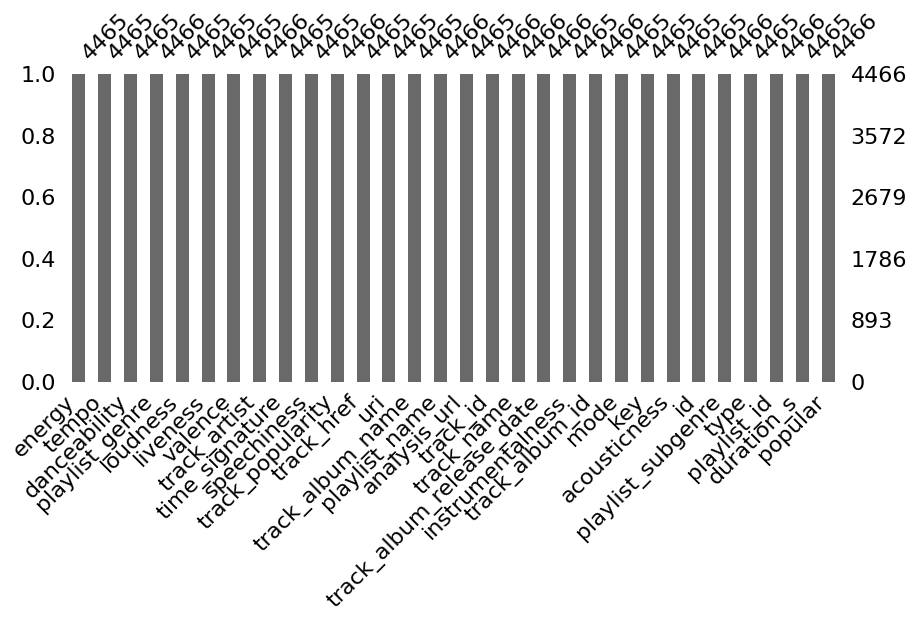

In [7]:
# Visualization of missingness
import missingno as msno
msno.bar(df_all, figsize=(10,4))


### 2.1.2 Duplicate Diagnostics

Although duplicate removal was performed earlier during preprocessing, a more detailed inspection was carried out to confirm the integrity of track-level records.  
Since a song may appear in multiple playlists, duplicates were identified based on the combination of `track_name` and `track_artist`, which uniquely defines a track.

This diagnostic step displays sample duplicate entries, verifies the number of duplicated records, and reconfirms that removing duplicates prevents overcounting the same track multiple times. This ensures that each unique song contributes equally to subsequent analyses.


In [ ]:
# Number of duplicate rows (full-row duplicates)
df_all.duplicated().sum()


np.int64(0)

In [ ]:
# Duplicate detection based on track_name + track_artist
duplicates = df_all[df_all.duplicated(subset=['track_name', 'track_artist'], keep=False)]
duplicates.head()


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,acousticness,id,playlist_subgenre,type,playlist_id,duration_s,popular


In [ ]:
# Remove duplicates based on track-level identifier
df_all = df_all.drop_duplicates(subset=['track_name', 'track_artist'])


### 2.1.3 Outlier Detection

To evaluate the presence of extreme values, outlier detection was performed using the Interquartile Range (IQR) method for all numeric musical features.  
While variables such as tempo and loudness exhibit outliers, these values reflect meaningful stylistic variation across musical genres rather than data errors.

Because outliers represent real differences in musical characteristics—such as high loudness in electronic tracks or low loudness in acoustic music—no removal was applied. Retaining these values maintains the natural distribution of musical features and supports accurate interpretation and modeling.


In [ ]:
# IQR-based outlier detection
numeric_cols = df_all.select_dtypes(include='number').columns

Q1 = df_all[numeric_cols].quantile(0.25)
Q3 = df_all[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_all[numeric_cols] < (Q1 - 1.5 * IQR)) | \
               (df_all[numeric_cols] > (Q3 + 1.5 * IQR))

outlier_counts = outlier_mask.sum().sort_values(ascending=False)
outlier_counts


,0
instrumentalness,840
speechiness,565
time_signature,492
liveness,393
loudness,373
duration_s,179
danceability,177
tempo,18
energy,0
valence,0


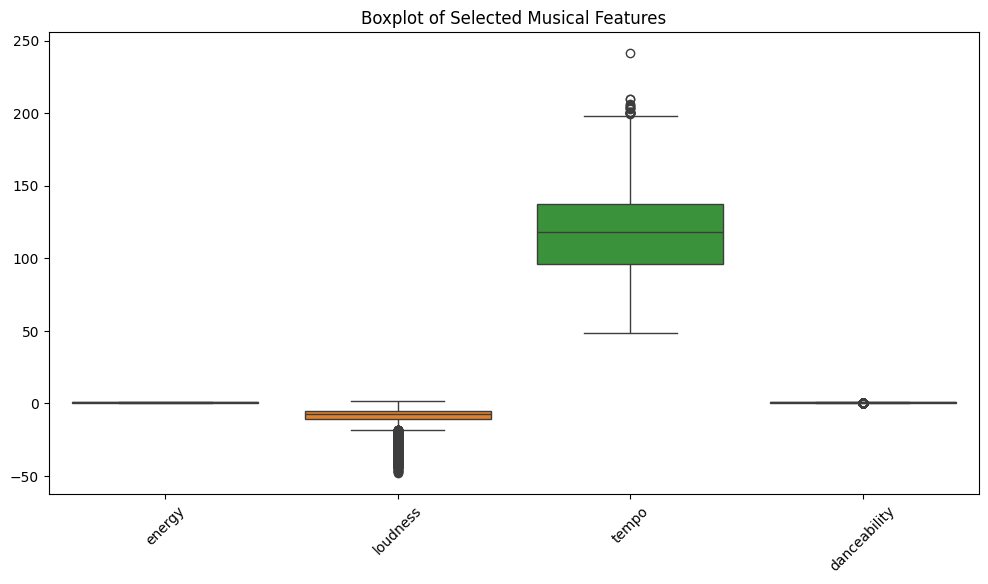

In [ ]:
# Boxplot visualization for selected numeric variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_all[['energy', 'loudness', 'tempo', 'danceability']])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Musical Features")
plt.show()


### **Overall Cleaning Summary**

After combining the high- and low-popularity datasets, a complete validation and cleaning workflow was performed to ensure that the final dataset is accurate, consistent, and ready for analysis.

Key outcomes of the full cleaning process include:

- **No full-row duplicates** were found in the combined dataset, confirming that playlist-level preprocessing had already removed redundant entries.  
- **Track-level deduplication** using `track_name` and `track_artist` verified that each song appears only once, preventing repeated tracks from skewing popularity or feature distributions.
- **Missing values are minimal**, with only a few numerical features containing a single missing entry each (below 0.05%). Because the missingness is extremely small and not systematic, **no imputation was applied**.
- **All musical features were standardized to numeric types**, enabling consistent comparison and modeling across the full dataset.
- **Outlier analysis using IQR** confirmed that extreme values (e.g., high loudness, low valence) represent meaningful stylistic differences across genres rather than data errors. Outliers were therefore **retained** to preserve the natural variability of musical characteristics.
- The resulting dataset contains **4,466 unique songs and 30 standardized columns**, providing a strong and reliable foundation for feature-level analysis and exploration of artist popularity trends.

This cleaned dataset will be used in the next section to compare musical features between popular and unpopular tracks and to investigate how acoustic characteristics relate to Spotify success.


### Part 2.2 – Feature Comparison: Popular vs Unpopular Songs

After completing data cleaning and validation,  
I conducted an exploratory data analysis (EDA) to compare the key musical features  
between **popular** and **unpopular** songs.  

This step helps reveal how musical characteristics such as **energy**, **valence**,  
and **danceability** influence a track’s likelihood of being popular on Spotify.  

Two complementary analyses are performed:
1. **Boxplot visualization** – shows distribution differences between popular and unpopular tracks.  
2. **Correlation matrix** – numerically quantifies how strongly each feature relates to popularity.


/tmp/ipython-input-2306460649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popular', y='energy', data=df_all, palette=['#8ecae6', '#ffb703'])


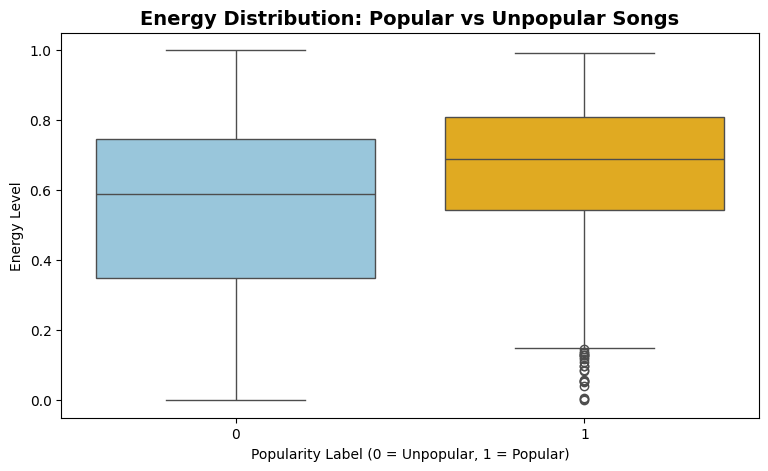

Feature,Correlation with Popularity
popular,1.000000
loudness,0.251485
energy,0.228412
valence,0.127455
danceability,0.112391
tempo,0.072527
liveness,0.029468
speechiness,-0.001311
acousticness,-0.256489
instrumentalness,-0.323456


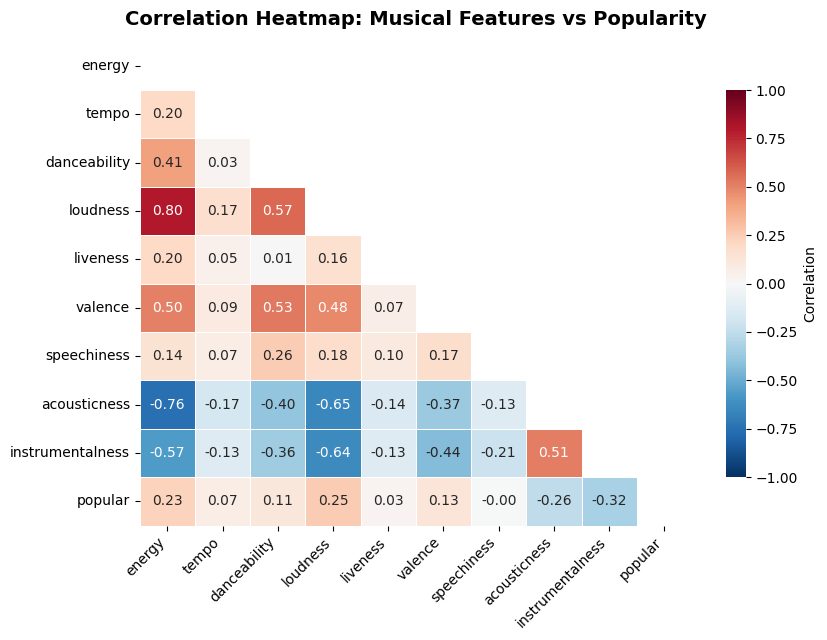

In [9]:
# 2.2 Feature-Level Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1Boxplot: Energy vs Popularity
plt.figure(figsize=(9,5))
sns.boxplot(x='popular', y='energy', data=df_all, palette=['#8ecae6', '#ffb703'])
plt.title('Energy Distribution: Popular vs Unpopular Songs', fontsize=14, weight='bold')
plt.xlabel('Popularity Label (0 = Unpopular, 1 = Popular)')
plt.ylabel('Energy Level')
plt.show()

# Correlation Table
corr = df_all[num_cols + ['popular']].corr()['popular'].sort_values(ascending=False)
corr_df = corr.reset_index()
corr_df.columns = ['Feature', 'Correlation with Popularity']

# Display formatted correlation table
from IPython.display import display
display(corr_df.style
        .set_table_styles([{'selector': 'th',
                            'props': [('background-color', '#1d3557'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center')]}])
        .set_properties(**{'text-align': 'center'})
        .background_gradient(cmap='YlGnBu', subset=['Correlation with Popularity'])
        .hide(axis='index'))

# Correlation Heatmap
plt.figure(figsize=(8.5,6.5))
mask = np.triu(np.ones_like(df_all[num_cols + ['popular']].corr(), dtype=bool))
sns.heatmap(
    df_all[num_cols + ['popular']].corr(),
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    linewidths=0.4,
)
plt.title("Correlation Heatmap: Musical Features vs Popularity", fontsize=14, weight='bold', pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Key Observations:**
- **Loudness** and **energy** show the strongest positive correlations with **popularity** (≈0.25 and 0.23).  
  This suggests that tracks with a more energetic and louder **production style** tend to be more popular.

- **Valence** and **danceability** also exhibit **positive correlations** with popularity, though at a weaker level.  
  They may contribute to listener engagement, but they are not dominant drivers.

- **Acousticness** and **instrumentalness** show clear **negative correlations** (≈ -0.26 and -0.32),  
  indicating that **acoustic-heavy** or **fully instrumental** tracks are notably less likely to be popular.

- The **heatmap** also reveals that **energy** and **loudness** are highly correlated with each other (≈0.80),  
  supporting the idea that energetic tracks often share strong **production intensity**.

,count
track_artist,
Bad Bunny,29
Ren Avel,26
Asake,19
LoFi Waiter,18
Seyi Vibez,17
Bnxn,14
Wizkid,13
Yume.Play,10
Linkin Park,10


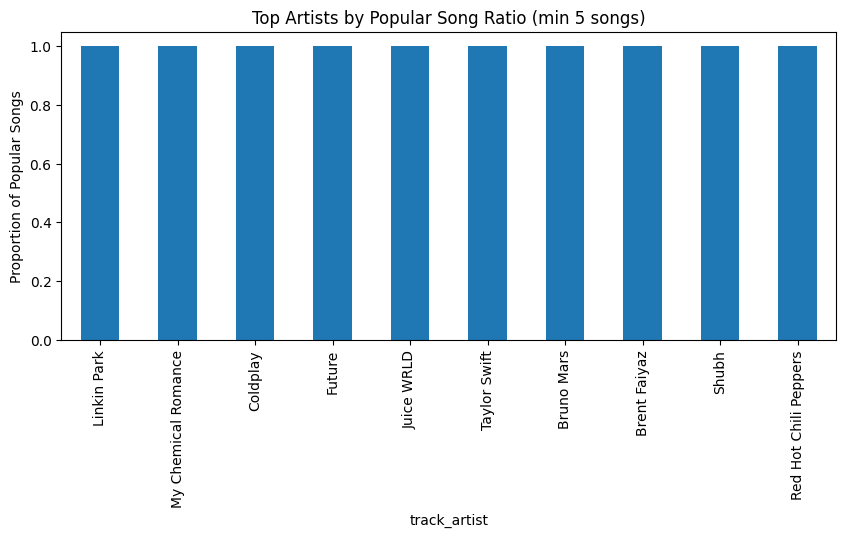

,song_count,popularity_ratio,avg_energy,avg_valence,avg_danceability
track_artist,,,,,
Linkin Park,10,1.0,0.873700,0.472100,0.551700
My Chemical Romance,7,1.0,0.901143,0.382386,0.342571
Coldplay,6,1.0,0.493500,0.198667,0.406500
Future,6,1.0,0.573667,0.216233,0.845500
Juice WRLD,7,1.0,0.611286,0.310200,0.688571
Taylor Swift,6,1.0,0.685833,0.511833,0.596667
Bruno Mars,6,1.0,0.667000,0.603667,0.710833
Brent Faiyaz,8,1.0,0.382750,0.476875,0.657500
Shubh,7,1.0,0.541143,0.621429,0.812857


In [10]:
# Count the most frequently appearing artists
artist_counts = df_all['track_artist'].value_counts().head(15)
display(artist_counts)

# Calculate the average popularity ratio for each artist
artist_stats = df_all.groupby('track_artist').agg(
    song_count=('popular','size'),
    popularity_ratio=('popular','mean'),
    avg_energy=('energy','mean'),
    avg_valence=('valence','mean'),
    avg_danceability=('danceability','mean')
).sort_values('popularity_ratio', ascending=False)

# Visualization
top_artists = artist_stats[artist_stats['song_count'] > 5].head(10)
top_artists['popularity_ratio'].plot(kind='bar', figsize=(10,4))
plt.title('Top Artists by Popular Song Ratio (min 5 songs)')
plt.ylabel('Proportion of Popular Songs')
plt.show()

display(top_artists)


## Part 3 – Artist Analysis (by Jing Pan)

In this section, I explore how different artists contribute to song popularity.  
By analyzing the proportion of popular songs per artist and their average musical characteristics,  
we can understand which artists consistently produce tracks that align with popular trends.


## Methods – Artist-Level Analysis (by Jing Pan)

This section analyzes artist-level patterns using aggregated data grouped by  
**`track_artist`**.

### Q1: Song Count vs Average Popularity  
For each artist, two key metrics were computed:  
- **song_count** – total number of tracks by the artist  
- **popularity_ratio** – proportion of tracks labeled as popular (`popular = 1`)  

A scatter plot and Pearson correlation coefficient were used to determine whether artists
with more tracks tend to have higher average popularity.

### Q2: Top Artists by Popular Song Ratio  
Artists with at least **5 tracks** were filtered to ensure meaningful statistics.  
The **top 10 artists** with the highest popularity ratios were selected for further study.

### Q2 Extension: Musical Features Analysis  
For these top artists, the following musical features were summarized:  
- **avg_energy**  
- **avg_valence**  
- **avg_danceability**  

A bar plot and formatted table were used to explore whether the top artists share similar
musical characteristics.


,count
track_artist,
Bad Bunny,29
Ren Avel,26
Asake,19
LoFi Waiter,18
Seyi Vibez,17
Bnxn,14
Wizkid,13
Yume.Play,10
Linkin Park,10


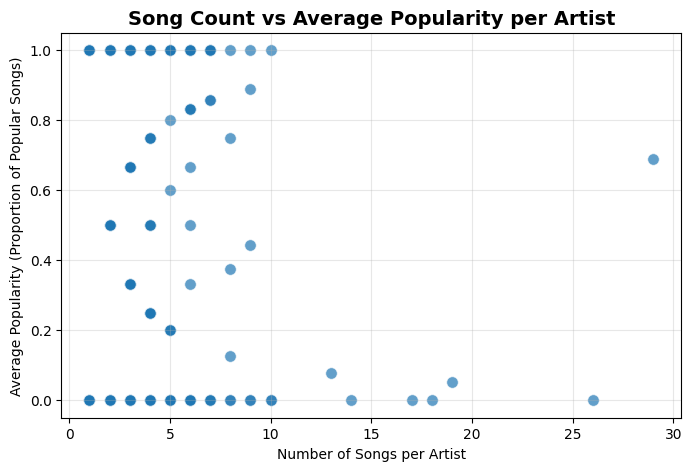

Correlation between song_count and popularity_ratio: 0.058


/tmp/ipython-input-4261719263.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


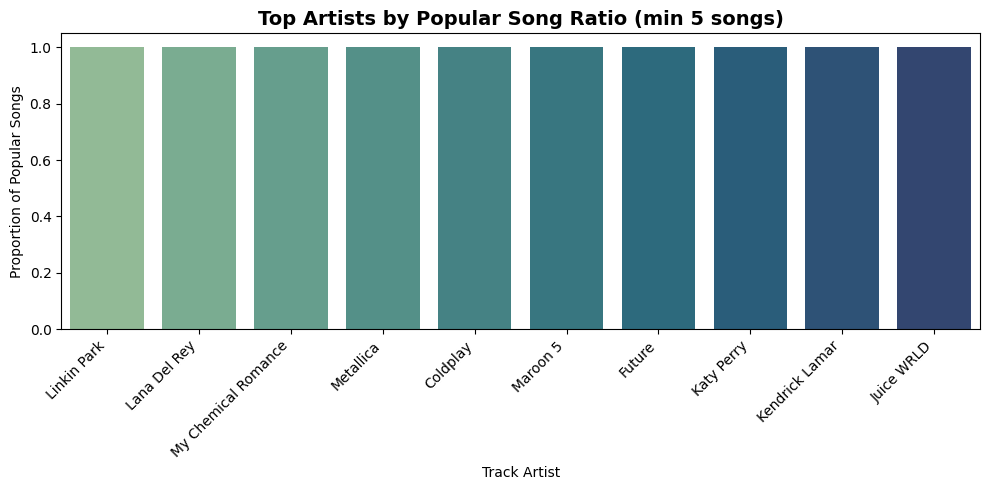

,song_count,popularity_ratio,avg_energy,avg_valence,avg_danceability
track_artist,,,,,
Linkin Park,10,1.0,0.874,0.472,0.552
Lana Del Rey,5,1.0,0.356,0.179,0.413
My Chemical Romance,7,1.0,0.901,0.382,0.343
Metallica,5,1.0,0.830,0.517,0.508
Coldplay,6,1.0,0.494,0.199,0.406
Maroon 5,5,1.0,0.671,0.726,0.726
Future,6,1.0,0.574,0.216,0.846
Katy Perry,5,1.0,0.801,0.696,0.662
Kendrick Lamar,5,1.0,0.587,0.371,0.785


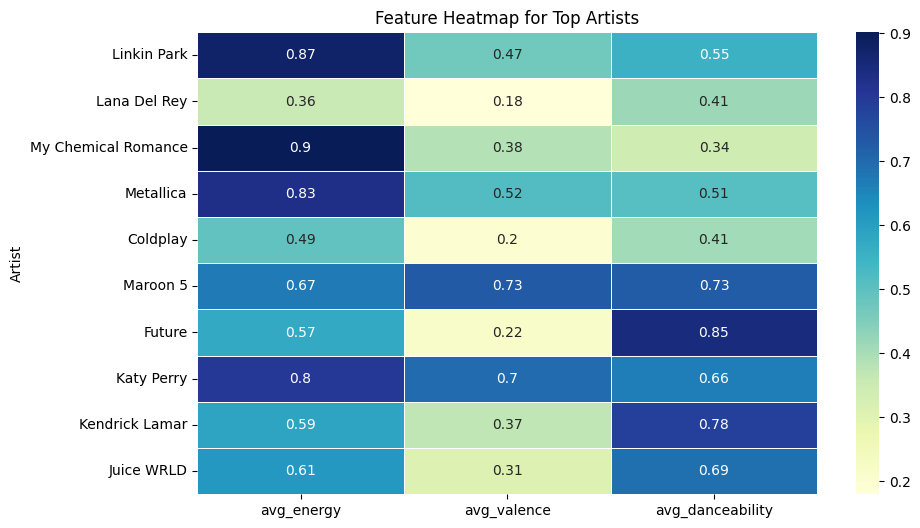

In [18]:
# Part 3 – Artist-Level Analysis (by Jing Pan)
# Overview:
# This section analyzes how artists differ in terms of:
# Q1: number of tracks vs. average popularity
# Q2: which artists have the highest proportion of popular songs
# Q2 extension: whether top artists share similar musical features


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count how many songs each artist has in the dataset
# Preview: Top 15 Artists by Song Count (Data Overview)
artist_counts = df_all['track_artist'].value_counts().head(15)
display(artist_counts)

# 3.1 Song Count vs Average Popularity (Q1)
# Goal: Examine whether artists with more songs tend to have higher average popularity.

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=artist_stats.reset_index(),
    x='song_count',
    y='popularity_ratio',
    alpha=0.7,
    s=70
)

plt.title("Song Count vs Average Popularity per Artist", fontsize=14, weight='bold')
plt.xlabel("Number of Songs per Artist")
plt.ylabel("Average Popularity (Proportion of Popular Songs)")
plt.grid(alpha=0.3)
plt.show()

# Check correlation for Q1
corr_q1 = artist_stats['song_count'].corr(artist_stats['popularity_ratio'])
print("Correlation between song_count and popularity_ratio:", round(corr_q1, 3))

# Compute per-artist statistics
# 3.2 Top Artists by Popular Song Ratio (Q2)
# Goal: Identify which artists have the highest proportion of popular songs.
artist_stats = (
    df_all.groupby('track_artist')
    .agg(
        song_count=('popular', 'size'),
        popularity_ratio=('popular', 'mean'),
        avg_energy=('energy', 'mean'),
        avg_valence=('valence', 'mean'),
        avg_danceability=('danceability', 'mean')
    )
    .sort_values('popularity_ratio', ascending=False)
)

# Filter artists with enough songs (min 5) for meaningful comparison
top_artists = artist_stats[artist_stats['song_count'] >= 5].head(10)

# Visualization: proportion of popular songs among top artists
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_artists.index,
    y='popularity_ratio',
    data=top_artists,
    palette='crest'
)
plt.title('Top Artists by Popular Song Ratio (min 5 songs)', fontsize=14, weight='bold')
plt.ylabel('Proportion of Popular Songs')
plt.xlabel('Track Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display detailed metrics for reference
display(top_artists.round(3))

# 3.3 Musical Features of Top Artists (Energy / Valence / Danceability)
# Goal: Visualize differences in musical features among top artists.
import seaborn as sns
plt.figure(figsize=(10,6))

sns.heatmap(
    top_artists[["avg_energy","avg_valence","avg_danceability"]],
    annot=True, cmap="YlGnBu", linewidths=0.5
)

plt.title("Feature Heatmap for Top Artists")
plt.ylabel("Artist")
plt.show()



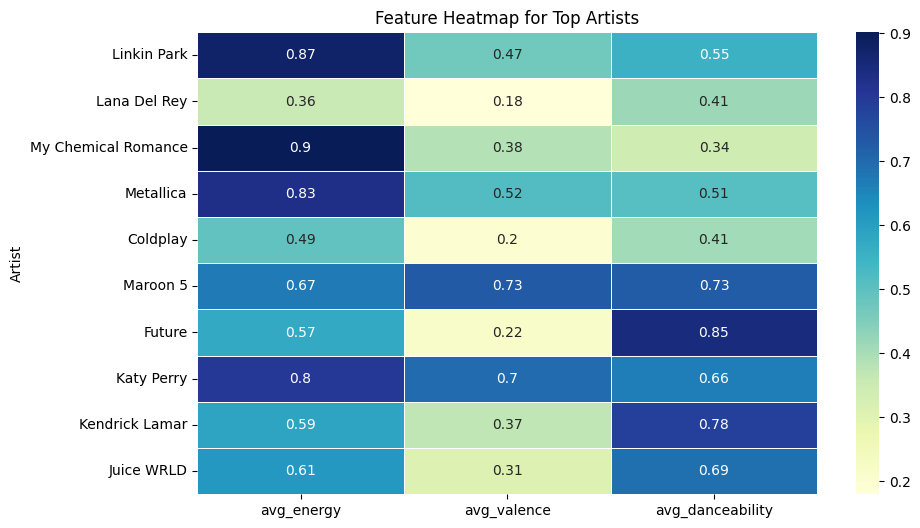

## Results – Q1: Song Count vs Average Popularity

The scatter plot shows **no strong relationship** between the number of tracks an artist
has and their average popularity. Most artists cluster around relatively low song counts,
and the points do not form any clear upward or downward trend.

The Pearson correlation coefficient is:

**r = 0.058**

This value is very close to zero, indicating that an artist releasing more songs does not
necessarily result in a higher proportion of popular songs. Some artists with only a few
tracks still achieve very high popularity ratios.


## Results – Q2: Top Artists and Their Musical Features

Among artists with at least 5 tracks, the top 10 artists all have a popularity ratio of
**1.0**, meaning every track they released (in this dataset) was categorized as popular.

These artists span a wide range of genres, including pop, rock, metal, hip-hop,
alternative, and emo rap. This indicates that strong popularity is not limited to a
single genre.

### Key Observations

- Artists such as **Linkin Park**, **Lana Del Rey**, **Coldplay**, and **Metallica**
  show the highest proportions of popular songs.

- These artists come from **diverse genres**, including pop, rock, hip-hop, metal,
  alternative, and emo rap — indicating that multiple genres can achieve strong popularity.

- High-energy artists like **My Chemical Romance**, **Metallica**, and **Linkin Park**
  tend to have high average energy values, suggesting that intense or dynamic musical
  styles resonate well with listeners.

- Pop artists such as **Katy Perry** and **Maroon 5** show higher **valence** and
  **danceability**, reflecting upbeat and emotionally positive styles that tend to
  appeal to large audiences.

- Artists such as **Lana Del Rey** and **Coldplay** have **lower energy and valence**,
  yet still maintain perfect popularity ratios — demonstrating that emotional,
  atmospheric, or mood-driven styles can also achieve high listener engagement.

- Overall, the diversity among these top artists suggests that high popularity on Spotify
  is **not driven by one specific musical feature**, but rather by how strongly the
  artist represents the strengths of their unique genre.
